# 배깅 작업을 위한 api 분할
1. 터미널 api
2. 컨테이너별 api 및 모델 load

In [16]:
import numpy as np
import requests 
import time
# "C:\Users\oem\Desktop\jhy\dataset2\Color\raw_1707797314.npy"

## Bagging Time Check

# 컨테이너 1개 모델 3개
전송 완료 시간:50.64438271522522
반환 완료 시간:0.12510132789611816
전체 완료 시간:50.76948404312134

전송 완료 시간:0.4844651222229004
반환 완료 시간:0.14256858825683594
전체 완료 시간:0.6270337104797363

전송 완료 시간:0.5132052898406982
반환 완료 시간:0.1241140365600586
전체 완료 시간:0.6373193264007568

# 컨테이너 2개 모델 6개
전송 완료 시간:101.74841070175171
반환 완료 시간:0.1414496898651123
전체 완료 시간:101.88986039161682

전송 완료 시간:0.9547030925750732
반환 완료 시간:0.14247393608093262
전체 완료 시간:1.0971770286560059

전송 완료 시간:0.5217752456665039
반환 완료 시간:0.1268913745880127
전체 완료 시간:0.6486666202545166

In [37]:
0.6486666202545166 - 0.6373193264007568

0.011347293853759766

In [45]:
# 컨테이너 1개 모델 3개
start_time = time.time()
input_data = np.expand_dims(np.zeros((30,156), dtype=np.float16), axis=0)
array_list = input_data.tolist()
for _ in range(100):
    res = requests.post('http://203.250.133.192:8080/receive', json={'array': array_list})
receive_time = time.time()
res = requests.get('http://203.250.133.192:8080/Word_End')
end_time = time.time()

print(f"전송 완료 시간:{receive_time-start_time}")
print(f"반환 완료 시간:{end_time-receive_time}")
print(f"전체 완료 시간:{end_time-start_time}")


전송 완료 시간:50.46997618675232
반환 완료 시간:0.14224481582641602
전체 완료 시간:50.612221002578735


In [43]:
requests.get('http://203.250.133.192:8080/Word_End')

<Response [200]>

In [4]:
# 컨테이너 2개 모델 6개
start_time = time.time()  
input_data = np.expand_dims(np.zeros((30,156), dtype=np.float16), axis=0)
array_list = input_data.tolist()
for _ in range(100):
    res = requests.post('http://203.250.133.192:8080/receive', json={'array': array_list})
receive_time = time.time()
res = requests.get('http://203.250.133.192:8080/Word_End')
end_time = time.time()

print(f"전송 완료 시간:{receive_time-start_time}")
print(f"반환 완료 시간:{end_time-receive_time}")
print(f"전체 완료 시간:{end_time-start_time}")


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

TODO
- bagging 100회
- 실제 영상

In [29]:
0.5217752456665039 /0.5067908763885498

1.029567164635509

## One Server Time Check

## 1회
전송 완료 시간:0.5067908763885498
반환 완료 시간:0.008976221084594727
전체 완료 시간:0.5157670974731445
## 100회
전송 완료 시간:54.34589910507202
반환 완료 시간:0.017012596130371094
전체 완료 시간:54.36291170120239



9개 1회
전송 완료 시간:0.7554721832275391
반환 완료 시간:0.010805368423461914
전체 완료 시간:0.766277551651001

9개 100회

In [3]:
meanReceive =0
meanReturn=0
meanTetal=0
for _ in range(1):
    start_time = time.time()
    input_data = np.expand_dims(np.zeros((30,156), dtype=np.float16), axis=0)
    array_list = input_data.tolist()
    for _ in range(1):
        res = requests.post('http://203.250.133.192:8000/receive', json={'array': array_list})
    # res = requests.post('http://203.250.133.192:8000/receive', json={'array': array_list})

    receive_time = time.time()
    res = requests.get('http://203.250.133.192:8000/confirm')
    end_time = time.time()

    meanReceive+=(receive_time-start_time)
    meanReturn+=(end_time-receive_time)
    meanTetal+=(end_time-start_time)
    # print(f"전송 완료 시간:{receive_time-start_time}")
    # print(f"반환 완료 시간:{end_time-receive_time}")
    # print(f"전체 완료 시간:{end_time-start_time}")
print(meanReceive/10)
print(meanReturn/10)
print(meanTetal/10)

ConnectionError: HTTPConnectionPool(host='203.250.133.192', port=8000): Max retries exceeded with url: /receive (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002E7CEDECE50>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

0.7304108285903931
0.008846635818481446
0.7392574644088745


In [40]:
requests.get('http://203.250.133.192:8000/confirm')

<Response [200]>

# REAL video ACC Test

In [ ]:
def prepare_sequences(file_path, sequence_length=30):
    data = np.load(file_path, allow_pickle=True).astype(np.float16)
    sequences = []
    for i in range(len(data) - sequence_length ):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    sequences = np.array(sequences)
    return sequences



# 1회
전송 완료 시간:0.7233085632324219
반환 완료 시간:0.13426780700683594
전체 완료 시간:0.8575763702392578
# 100회
전송 완료 시간:80.48880195617676
반환 완료 시간:0.14667725563049316
전체 완료 시간:80.63547921180725

In [98]:
meanReceive =0
meanReturn=0
meanTetal=0
for _ in range(10):
    start_time = time.time()  
    input_data = np.expand_dims(np.zeros((30,156), dtype=np.float16), axis=0)
    array_list = input_data.tolist()
    for _ in range(1):
        res = requests.post('http://203.250.133.192:8080/receive', json={'array': array_list})
    receive_time = time.time()
    res = requests.get('http://203.250.133.192:8080/Word_End')
    end_time = time.time()

    meanReceive+=(receive_time-start_time)
    meanReturn+=(end_time-receive_time)
    meanTetal+=(end_time-start_time)
# print(f"전송 완료 시간:{receive_time-start_time}")
# print(f"반환 완료 시간:{end_time-receive_time}")
# print(f"전체 완료 시간:{end_time-start_time}")
print(meanReceive/10)
print(meanReturn/10)
print(meanTetal/10)


0.5555990934371948
0.1407336711883545
0.6963327646255493


In [93]:
input_data = np.expand_dims(np.ones((30,156), dtype=np.float16), axis=0)
array_list = input_data.tolist()
# len(array_list[1])

res = requests.post('http://203.250.133.192:8080/receive', json={'array': array_list})
print(res.json())
res = requests.get('http://203.250.133.192:8080/Word_End')
print(res.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [44]:
import pickle 
with open(r'C:\Users\oem\Desktop\jhy\signlanguage\SignLanguageTranslator\logs\1645_act_list.pkl', 'rb') as file:
        actions = pickle.load(file)
        print(len(actions),'개의 액션이 저장되어있습니다.')

1645 개의 액션이 저장되어있습니다.


In [ ]:
import os
import numpy as np

path = 'C:/Users/oem/Desktop/jhy/dataset/'
# actions = ['walking', 'running', 'jumping']  # 예시로 사용할 액션 리스트

def extract_sequences(base_dir, sequence_length=30, num_sequences=10):
    sequences = []  # 결과 시퀀스를 저장할 리스트
    
    # dataset 폴더의 모든 하위 폴더를 탐색
    for subdir, dirs, files in os.walk(base_dir):
        act = os.path.basename(subdir)  # 현재 폴더 이름
        if act in actions:  # actions 리스트에 현재 폴더 이름이 있는 경우
            act_idx = actions.index(act)  # 현재 액션의 인덱스
            
            for file in files:
                if file.endswith('.npy'):
                    file_path = os.path.join(subdir, file)  # 파일의 전체 경로
                    data = np.load(file_path)  # 파일에서 배열 로드

                    # (30, 156) 크기의 시퀀스 10개 추출
                    for start in range(0, len(data) - sequence_length + 1, len(data) // num_sequences):
                        end = start + sequence_length
                        if end <= len(data):
                            sequence = data[start:end]
                            if sequence.shape == (sequence_length, 156):
                                sequences.append([sequence, act_idx])
                                if len(sequences) % num_sequences == 0:
                                    break  # 10개의 시퀀스를 찾으면 멈춤
    return sequences

# 추출된 시퀀스 목록을 얻음
extracted_sequences = extract_sequences(path)


In [46]:
len(extracted_sequences)

16400

In [50]:
# 초기화
res = requests.get('http://203.250.133.192:8080/Word_End')
TIME_RECORD=[]
all_data = 0
True_data=0
false_data = 0

In [90]:
from tqdm import tqdm
import matplotlib.pyplot as plt

#1413, 1491, 2763,3500

res = requests.get('http://203.250.133.192:8080/Word_End')
for seq in tqdm(extracted_sequences[len(TIME_RECORD):]):

    data,idx =seq
    all_data+=1
    a = np.expand_dims(data, axis=0)
    list_data = a.tolist()
    res = requests.post('http://203.250.133.192:8080/receive', json={'array': list_data})
    return_time = res.json()['return_time']
    TIME_RECORD.append(return_time)
    res = requests.get('http://203.250.133.192:8080/Word_End')
    # print(idx,res.json()['word_idx'])
    if res.json()['word_idx'] == idx:
        True_data+=1
    else:
        false_data+=1

        

print(f'전체 데이터 수: {all_data} ')
print(f'True 데이터 수: {True_data} ')
print(f'False 데이터 수: {false_data} ')
print(f'정확도: {(True_data/all_data)}%')


  3%|▎         | 305/10980 [04:26<2:35:20,  1.15it/s]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
res = requests.get('http://203.250.133.192:8080/Word_End')
res.json()

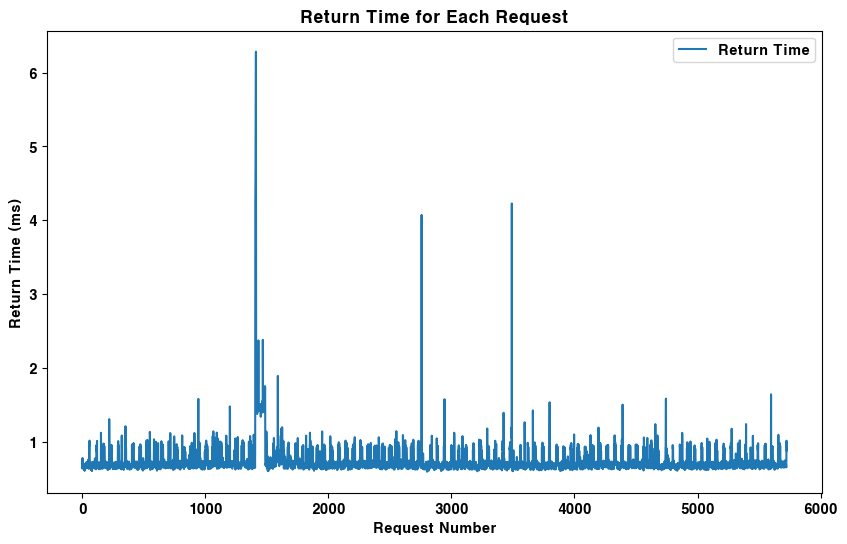

In [94]:

plt.figure(figsize=(10, 6))
plt.plot(TIME_RECORD, label='Return Time')
plt.title('Return Time for Each Request')
plt.xlabel('Request Number')
plt.ylabel('Return Time (ms)')
plt.legend()
plt.show()

In [96]:
print(f'전체 데이터 수: {all_data} ')
print(f'True 데이터 수: {True_data} ')
print(f'False 데이터 수: {false_data} ')
print(f'정확도: {(True_data/(True_data + false_data))}%')

전체 데이터 수: 5739 
True 데이터 수: 5315 
False 데이터 수: 407 
정확도: 0.9288710241174415%
